In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [82]:
df_test=pd.read_csv(r"C:\Users\aqilh\OneDrive\Documents\GLA DA\Python\Loan Approval System\Dataset\loan_test.csv")

In [83]:
df_train=pd.read_csv(r"C:\Users\aqilh\OneDrive\Documents\GLA DA\Python\Loan Approval System\Dataset\loan_train.csv")

In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [85]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [86]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [104]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [88]:
df_train['Gender'].loc[df_train['Gender'].isnull()]

23     NaN
126    NaN
171    NaN
188    NaN
314    NaN
334    NaN
460    NaN
467    NaN
477    NaN
507    NaN
576    NaN
588    NaN
592    NaN
Name: Gender, dtype: object

In [89]:
df_train['Gender'].loc[df_train['Gender'].isnull()] = df_train["Gender"].mode()[0]


C:\Users\aqilh\AppData\Local\Temp\ipykernel_23164\779364143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Gender'].loc[df_train['Gender'].isnull()] = df_train["Gender"].mode()[0]


In [91]:
df_train['Gender'].iloc[23]

'Male'

In [28]:
gm1=df_train["Married"].mode()

In [93]:
df_train['Married'].loc[df_train['Married'].isnull()]

Series([], Name: Married, dtype: object)

In [94]:
df_train.iloc[104]

Loan_ID              LP001357
Gender                   Male
Married                   Yes
Dependents                NaN
Education            Graduate
Self_Employed              No
ApplicantIncome          3816
CoapplicantIncome       754.0
LoanAmount              160.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 104, dtype: object

In [92]:
df_train['Married'].loc[df_train['Married'].isnull()]=df_train["Married"].mode()[0]

C:\Users\aqilh\AppData\Local\Temp\ipykernel_23164\1644540599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Married'].loc[df_train['Married'].isnull()]=df_train["Married"].mode()[0]


In [36]:
sf=df_train["Self_Employed"].mode()

In [37]:
sf

0    No
Name: Self_Employed, dtype: object

In [96]:
df_train['Self_Employed'].loc[df_train['Self_Employed'].isnull()]=df_train["Self_Employed"].mode()[0]

C:\Users\aqilh\AppData\Local\Temp\ipykernel_23164\1046609721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Self_Employed'].loc[df_train['Self_Employed'].isnull()]=df_train["Self_Employed"].mode()[0]


In [99]:

df_train['Credit_History'].loc[df_train['Credit_History'].isnull()]=df_train["Credit_History"].mean()

C:\Users\aqilh\AppData\Local\Temp\ipykernel_23164\74125378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Credit_History'].loc[df_train['Credit_History'].isnull()]=df_train["Credit_History"].mean()


In [101]:

df_train['LoanAmount'].loc[df_train['LoanAmount'].isnull()]=df_train["LoanAmount"].mean()

C:\Users\aqilh\AppData\Local\Temp\ipykernel_23164\2741954902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['LoanAmount'].loc[df_train['LoanAmount'].isnull()]=df_train["LoanAmount"].mean()


In [103]:

df_train['Loan_Amount_Term'].loc[df_train['Loan_Amount_Term'].isnull()]=df_train["Loan_Amount_Term"].mean()

C:\Users\aqilh\AppData\Local\Temp\ipykernel_23164\1841070120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Loan_Amount_Term'].loc[df_train['Loan_Amount_Term'].isnull()]=df_train["Loan_Amount_Term"].mean()


In [105]:
df_train['Dependents'].loc[df_train['Dependents'].isnull()] = df_train["Dependents"].mode()[0]


C:\Users\aqilh\AppData\Local\Temp\ipykernel_23164\602163396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Dependents'].loc[df_train['Dependents'].isnull()] = df_train["Dependents"].mode()[0]


In [106]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [107]:
df_train.drop("Loan_ID",axis = 1, inplace=True)

In [110]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [109]:
df_train['Dependents'].replace({"3+":"3"}, inplace=True)

In [111]:
df_train['Dependents']= pd.to_numeric(df_train['Dependents'])

In [112]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [114]:
lb = LabelEncoder()

In [115]:
df_train['Gender'] = lb.fit_transform(df_train['Gender'])

In [116]:
df_train['Married'] = lb.fit_transform(df_train['Married'])

In [117]:
df_train['Self_Employed'] = lb.fit_transform(df_train['Self_Employed'])

In [118]:
df_train['Education'] = lb.fit_transform(df_train['Education'])

In [119]:
df_train['Property_Area'] = lb.fit_transform(df_train['Property_Area'])

In [122]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [121]:
df_train["Loan_Status"].replace({'Y':1, 'N':0}, inplace=True)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [125]:
X= df_train.drop('Loan_Status', axis=1)

In [126]:
y=df_train['Loan_Status']

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=2549)

In [129]:
Lgr=LogisticRegression()

In [130]:
Lgr.fit(X_train,y_train)

c:\Users\aqilh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
Lgr.score(X_test,y_test)

0.7987012987012987

In [132]:
Lgr.score(X_train,y_train)

0.8152173913043478

In [133]:
df_train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


{'whiskers': [<matplotlib.lines.Line2D at 0x1ae3f8947d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae61d87f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae61d86150>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae61d9d010>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae61d9d950>],
 'means': []}

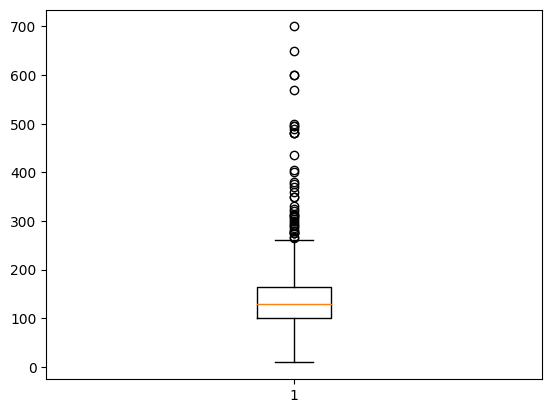

In [134]:
plt.boxplot(df_train['LoanAmount'])

In [135]:
np.log10(df_train['LoanAmount'])

0      2.165577
1      2.107210
2      1.819544
3      2.079181
4      2.149219
         ...   
609    1.851258
610    1.602060
611    2.403121
612    2.271842
613    2.123852
Name: LoanAmount, Length: 614, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae61e0fbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae61e2cf90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae61e0f310>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae61e2dfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae61dce6d0>],
 'means': []}

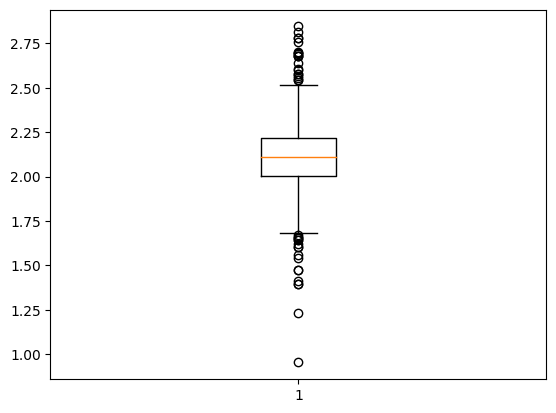

In [136]:
plt.boxplot(np.log10(df_train['LoanAmount']))

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae61e94bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae61e95e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae61e94310>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae61e96f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae61e95b10>],
 'means': []}

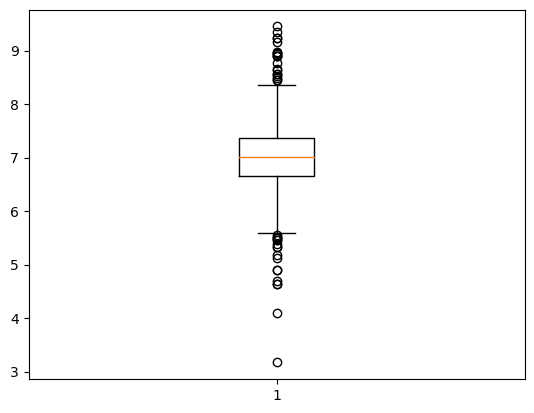

In [137]:
plt.boxplot(np.log2(df_train['LoanAmount']))

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae61efe350>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae61eff650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae61efd950>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae61f08610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae61df1090>],
 'means': []}

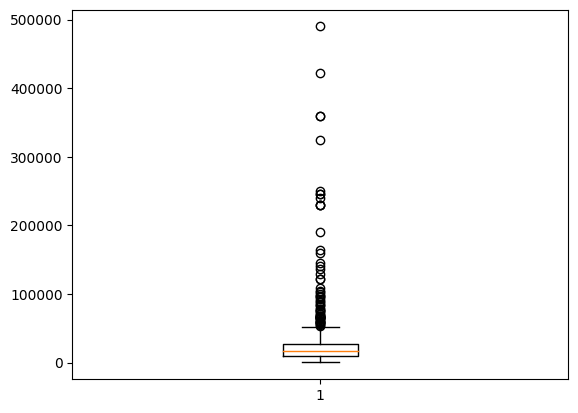

In [138]:
plt.boxplot(np.power(df_train['LoanAmount'],2))

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae61f61d50>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae61f63010>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae61f61390>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae61f6c190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae61f6c910>],
 'means': []}

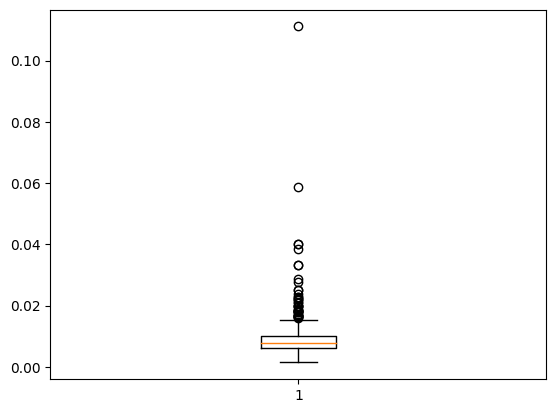

In [139]:
plt.boxplot(np.power(df_train['LoanAmount'],-1))

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae61fc1690>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae61fc2a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae61fc0cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae61fc3b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae61fd4450>],
 'means': []}

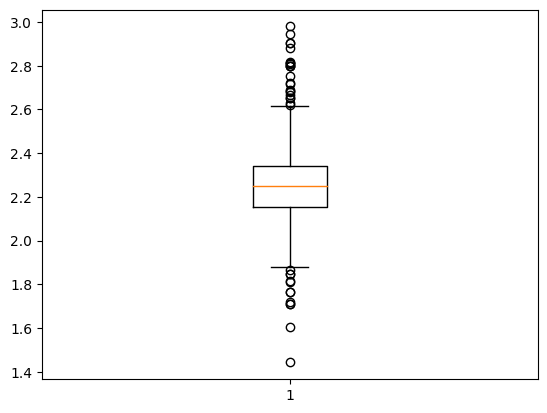

In [140]:
plt.boxplot(np.power(df_train['LoanAmount'],1/6))

In [141]:
from sklearn.ensemble import RandomForestClassifier
rfs = RandomForestClassifier()
rfs.fit(X_train,y_train)

RandomForestClassifier()

In [142]:
rfs.score(X_test,y_test)

0.7402597402597403

In [143]:
rfs.score(X_train,y_train)

1.0

In [144]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [145]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [146]:
rf1=RandomForestClassifier()

In [147]:
model1= GridSearchCV(estimator=rf1,param_grid=param_grid, cv=5) 

In [148]:
model1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [149]:
model1.best_score_

0.8195652173913043

In [150]:
model1.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=2)

In [151]:
model1.best_params_

{'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [154]:
rf2 = RandomForestClassifier(max_depth= 25,
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 100)

In [155]:
rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2)

In [156]:
rf2.score(X_test,y_test)

0.7792207792207793

In [157]:
rf2.score(X_train,y_train)

0.9369565217391305

In [176]:
model2= GridSearchCV(estimator=rf2,param_grid=param_grid, cv=4) 

In [177]:
model2.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=30, min_samples_leaf=2),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [178]:
model2.best_score_

0.817391304347826

In [179]:
model2.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

In [180]:
model2.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [181]:
rf3 = RandomForestClassifier(max_depth= 10,
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 50)

In [182]:
rf3.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

In [183]:
rf3.score(X_test,y_test)

0.7467532467532467

In [184]:
rf3.score(X_train,y_train)

0.9282608695652174

In [185]:
rf4 = RandomForestClassifier(max_depth= 25,
 min_samples_leaf= 4,
 min_samples_split= 4,
 n_estimators= 125)

In [195]:
model3 = GridSearchCV(estimator=rf4, param_grid=param_grid, cv=5)

In [196]:
model3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=25, min_samples_leaf=4,
                                              min_samples_split=4,
                                              n_estimators=125),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [197]:
model3.best_score_

0.8195652173913043

In [198]:
model3.best_estimator_

RandomForestClassifier(max_depth=20)

In [199]:
model3.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [200]:
rf5 = RandomForestClassifier(max_depth= 20,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100)

In [201]:
rf5.fit(X_train,y_train)

RandomForestClassifier(max_depth=20)

In [202]:
rf5.score(X_test,y_test)

0.7467532467532467

In [203]:
rf5.score(X_train,y_train)

1.0